In [1]:
import re
import unicodedata

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.distance import cdist
from scipy.stats import ttest_ind, zscore

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_rows', None)

In [2]:
DATA_DIR = './Leagues'

## 포지션별 스탯
STATS_PER_POSITION = {
    'Goalkeeper' : ['Total_Saves', 'SixYardBox_Saves', 'PenaltyArea_Saves', 'OutOfBox_Saves'],
 

    'Centre-Back' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 
        'Total_Interception', 
        'Total_Clearances',
        'ShotsBlocked', 'CrossesBlocked', 'PassesBlocked',
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Crosses_per_game', 'Corner', 'Throughball'
        ],


    'Right-Back' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 
        'Total_Interception', 
        'Total_Clearances',
        'ShotsBlocked', 'CrossesBlocked', 'PassesBlocked',
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Crosses_per_game', 'Corner', 'Throughball'
        ],


    'Left-Back' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 
        'Total_Interception', 
        'Total_Clearances',
        'ShotsBlocked', 'CrossesBlocked', 'PassesBlocked',
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Crosses_per_game', 'Corner', 'Throughball'
        ],

    'Left Winger' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Crosses_per_game', 'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Right Winger' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Crosses_per_game', 'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Central Midfield' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Left Midfield' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Right Midfield' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Defensive Midfield' : [
        'TotalTackles', 'DribbledPast', 'TotalAttemptedTackles', 
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Attacking Midfield' : [
        'Total_Interception', 
        'Fouls', 'Fouled', 
        'Total_Interception', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Centre-Forward' : [
        'Fouled', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        # 'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],


    'Second Striker' : [
        'Fouled', 
        'Yel', 'Red', 'AerialsWon',
        'AccLB', 'AccSP',
        'Longpass_per_game', 'Shortpass_per_game',
        # 'Corner', 'Throughball', 'Freekick',
        'Unsuccessful_Dribbles', 'Successful_Dribbles',
        'UnsuccessfulTouches', 'Dispossessed',
        'xG', 'xGPerNinety', 'totalShots',
        ],
}


In [3]:
players_stats = pd.read_csv(f'{DATA_DIR}/all_players_stats.csv', encoding='utf-8')
players_values = pd.read_csv(f'{DATA_DIR}/all_players_values.csv', encoding='utf-8')
players_details = pd.read_csv(f'{DATA_DIR}/all_players_stats_details.csv', encoding='utf-8')

teams_stats = pd.read_csv(f'{DATA_DIR}/all_teams_stats.csv', encoding='utf-8')
teams_values = pd.read_csv(f'{DATA_DIR}/all_teams_values.csv', encoding='utf-8')

In [4]:
def convert_market_value(value):
    if pd.isna(value):
        return None
    value = value.replace('€', '').strip().lower()
    if 'm' in value:
        return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
        return float(value.replace('k', '')) * 1_000
    try:
        return float(value)
    except ValueError:
        return None

players_values['Market Value'] = players_values['Market Value'].apply(convert_market_value)

In [5]:
players_details_reduced = players_details.drop(columns=['player_name', 'team_name'])
players_totals = players_stats.merge(players_details_reduced, left_index=True, right_index=True, how='left')

players_values_reduced = players_values.drop(columns=['Team', 'Position', 'Date of Birth', 'Age', 'Nationality'])
players_values_reduced.rename(columns={'Name': 'player_name'}, inplace=True)
players_totals = players_totals.merge(players_values_reduced, on='player_name', how='left')

players_totals.rename(columns={
    'Red_x': 'Red', 
    'Fouls_y' : 'Fouls', 
    'Yellow' : 'Yel_x',
    'Short' : 'Shortpass_per_game',
    'Unsuccessful' : 'Unsuccessful_Dribbles',
    'Successful' : 'Successful_Dribbles'
}, inplace=True)
players_totals = players_totals[[col for col in players_totals.columns if not col.endswith('_x') and not col.endswith('_y')]]

players_totals['team_name'] = players_totals['team_name'].fillna('')
players_totals.drop_duplicates(subset=['player_name', 'team_name'], inplace=True)

players_totals.to_csv('./Leagues/all_players_stats_total.csv', index=False)
players_totals.head(10)


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yel,Red,...,Long,Shortpass_per_game,Cross,Corner,Throughball,Freekick,Throwin,Other,Total_Assists,Market Value
0,Asmir Begovic,Everton,36,Goalkeeper,1,90,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0
1,Kevin De Bruyne,Manchester City,32,Attacking Midfield,28(4),2425,7,16,1,0,...,0.8,2.2,0.2,0.0,0.1,0.0,0.0,0.2,0.5,70000000.0
2,Stefan Ortega,Manchester City,31,Goalkeeper,3,270,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000000.0
3,Erling Haaland,Manchester City,23,Centre-Forward,33(2),2779,36,8,5,0,...,0.0,0.9,0.0,0.0,0.1,0.0,0.0,0.2,0.2,180000000.0
4,Harry Kane,Tottenham,30,Centre-Forward,38,3408,30,3,6,0,...,0.3,1.2,0.0,0.0,0.0,0.0,0.0,0.1,0.1,90000000.0
5,Bruno Fernandes,Manchester United,29,Attacking Midfield,37,3320,8,8,6,0,...,0.6,2.6,0.0,0.0,0.1,0.0,0.0,0.1,0.2,75000000.0
6,Gabriel Jesus,Arsenal,27,Centre-Forward,24(2),2075,11,6,6,0,...,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.2,0.2,75000000.0
7,Kieran Trippier,Newcastle,33,Right-Back,38,3348,1,7,5,0,...,1.7,1.2,0.1,0.0,0.0,0.1,0.0,0.0,0.2,11000000.0
8,Bukayo Saka,Arsenal,22,Right Winger,37(1),3195,14,11,6,0,...,0.5,1.5,0.1,0.1,0.0,0.0,0.0,0.2,0.3,120000000.0
9,Solly March,Brighton,29,Right Winger,31(2),2728,7,7,2,0,...,0.4,1.6,0.1,0.0,0.0,0.0,0.0,0.1,0.2,22000000.0


In [6]:
players_totals['position'].unique()

array(['Goalkeeper', 'Attacking Midfield', 'Centre-Forward', 'Right-Back',
       'Right Winger', 'Left Winger', 'Defensive Midfield',
       'Central Midfield', 'Centre-Back', 'Left-Back', 'Left Midfield',
       'Second Striker', 'Right Midfield'], dtype=object)

In [7]:
def group_top_teams_by_position(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
    
    top_teams_df = all_players_stats[
        (all_players_stats['team_name'].isin(top_teams)) &
        (all_players_stats['Apps'].apply(lambda x: int(x.split('(')[0]) if pd.notna(x) else 0) >= 15)
    ].copy()
    
    top_teams_df['positions'] = top_teams_df['position'].apply(lambda x: [pos.strip() for pos in x.split(',') if pd.notna(x)])
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        
        for pos in player_positions:
            position_groups[pos].append(player_name)
    
    return position_groups, top_teams

top_position_groups, top_teams = group_top_teams_by_position(players_totals, teams_stats)

In [8]:
print(top_teams)
for position, players in top_position_groups.items():
    print(position, players)

['Napoli', 'Manchester City', 'Barcelona', 'Paris Saint-Germain', 'Arsenal', 'Lens', 'Real Madrid', 'Atletico Madrid', 'Manchester United', 'Lazio', 'Marseille', 'Inter', 'Newcastle', 'Bayern Munich', 'Borussia Dortmund']
Goalkeeper ['Nick Pope', 'David De Gea', 'Aaron Ramsdale', 'Ederson', 'Gianluigi Donnarumma', 'Pau López', 'Brice Samba', 'Gregor Kobel', 'Yann Sommer', 'Ivan Provedel', 'André Onana', 'Alex Meret', 'Thibaut Courtois', 'Marc-André Ter Stegen', 'Jan Oblak']
Left Winger ['Jack Grealish', 'Gabriel Martinelli', 'Marcus Rashford', 'Jadon Sancho', 'Neymar', 'Kingsley Coman', 'Karim Adeyemi', 'Sadio Mané', 'Khvicha Kvaratskhelia', 'Mattia Zaccagni', 'Vinícius Júnior', 'Yannick Carrasco']
Centre-Forward ['Erling Haaland', 'Gabriel Jesus', 'Alexander Isak', 'Callum Wilson', 'Kylian Mbappé', 'Florian Sotoca', 'Alexis Sánchez', 'Loïs Openda', 'Sébastien Haller', 'Victor Osimhen', 'Lautaro Martínez', 'Romelu Lukaku', 'Ciro Immobile', 'Edin Dzeko', 'Antoine Griezmann', 'Karim Benz

In [9]:
def group_lower_teams_by_position_per_league(all_players_stats, all_teams_stats):
    # 팀별 점수를 숫자형으로 변환
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])

    # 각 리그별로 상위 3개 팀 제외
    excluded_teams_per_league = all_teams_stats.groupby('League').apply(lambda x: x.nlargest(3, 'Pts')['team_name']).tolist()

    # 포지션별 그룹화를 위한 빈 딕셔너리
    position_groups = {}

    # 각 리그별로 처리
    for league in all_teams_stats['League'].unique():
        lower_teams = all_teams_stats[
            (all_teams_stats['League'] == league) & (~all_teams_stats['team_name'].isin(excluded_teams_per_league))
        ]['team_name'].tolist()

        # 4위부터 최하위 팀까지의 선수 데이터 필터링
        lower_teams_df = all_players_stats[
            (all_players_stats['team_name'].isin(lower_teams)) &
            (all_players_stats['Apps'].apply(lambda x: int(x.split('(')[0]) if pd.notna(x) else 0) >= 15)
        ]

        # 포지션별로 선수 이름 저장
        for _, row in lower_teams_df.iterrows():
            positions = [pos.strip() for pos in row['position'].split(',') if pd.notna(row['position'])]
            player_name = row['player_name']
            for pos in positions:
                if pos in position_groups:
                    position_groups[pos].append(player_name)
                else:
                    position_groups[pos] = [player_name]

    return position_groups

bottom_position_groups = group_lower_teams_by_position_per_league(players_totals, teams_stats)

In [10]:
position_groups = group_lower_teams_by_position_per_league(players_totals, teams_stats)

for position, players in position_groups.items():
    print(f"{position}: {players}")

Centre-Forward: ['Harry Kane', 'Ivan Toney', 'Aleksandar Mitrovic', 'Alexander Isak', 'Ollie Watkins', 'Callum Wilson', 'Jordan Ayew', 'Darwin Núñez', 'Dominic Solanke', 'Danny Welbeck', 'Rodrigo', 'Dominic Calvert-Lewin', 'Ché Adams', 'Taiwo Awoniyi', 'Michail Antonio', 'Odsonne Édouard', 'Patrick Bamford', 'Jamie Vardy', 'Diego Costa', 'Alexandre Lacazette', 'Terem Moffi', 'Jonathan David', 'Gaëtan Laborde', 'Steve Mounié', 'Wissam Ben Yedder', 'Habib Diallo', 'Terem Moffi', 'Karl Toko Ekambi', 'Folarin Balogun', 'Elye Wahi', 'Breel Embolo', 'Mama Baldé', 'Nuno Da Costa', 'Grejohn Kyei', 'Thijs Dallinga', 'Mostafa Mohamed', 'Arnaud Kalimuendo', 'Kevin Gameiro', 'Ignatius Ganago', 'Mounaïm El Idrissy', 'Evann Guessand', 'Ibrahima Koné', 'Ibrahima Niané', 'Adrien Hunou', 'Komnen Andric', "M'Baye Niang", 'Niclas Füllkrug', 'Randal Kolo Muani', 'Michael Gregoritsch', 'Marcus Thuram', 'Philipp Hofmann', 'Marvin Ducksch', 'Ludovic Ajorque', 'Sheraldo Becker', 'Lucas Höler', 'Kevin Behrens'

In [11]:
def find_similar_players(top_players_stats, bottom_players_stats, position):
    top_players_stats_filtered = top_players_stats[top_players_stats['player_name'].isin(top_position_groups[position])]
    bottom_players_stats_filtered = bottom_players_stats[bottom_players_stats['player_name'].isin(bottom_position_groups[position])]
    
    stat_columns = STATS_PER_POSITION[position]
    
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    
    top_players_stats_imputed = imputer.fit_transform(top_players_stats_filtered[stat_columns])
    top_players_stats_scaled = scaler.fit_transform(top_players_stats_imputed)
    top_players_avg_stats = top_players_stats_scaled.mean(axis=0).reshape(1, -1)
    
    bottom_players_stats_imputed = imputer.transform(bottom_players_stats_filtered[stat_columns])
    bottom_players_stats_scaled = scaler.transform(bottom_players_stats_imputed)
    
    similarity_scores = cosine_similarity(bottom_players_stats_scaled, top_players_avg_stats)
    most_similar_indices = similarity_scores.argsort(axis=0)[::-1].flatten()
    most_similar_players = bottom_players_stats_filtered.iloc[most_similar_indices]['player_name'].tolist()
    
    return most_similar_players

In [12]:
top_players_stats = players_totals[players_totals['team_name'].isin(top_teams)]
bottom_players_stats = players_totals[~players_totals['team_name'].isin(top_teams)]

/var/folders/h2/dxdwtry542514hp51hkrx__h0000gn/T/ipykernel_40960/1770638960.py:18: UserWarning: The palette list has more values (73) than needed (70), which may not be intended.
  sns.barplot(x='stat', y='value', hue='player_name', data=melted_stats, palette=sns.color_palette("husl", len(combined_stats)))
/var/folders/h2/dxdwtry542514hp51hkrx__h0000gn/T/ipykernel_40960/1770638960.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


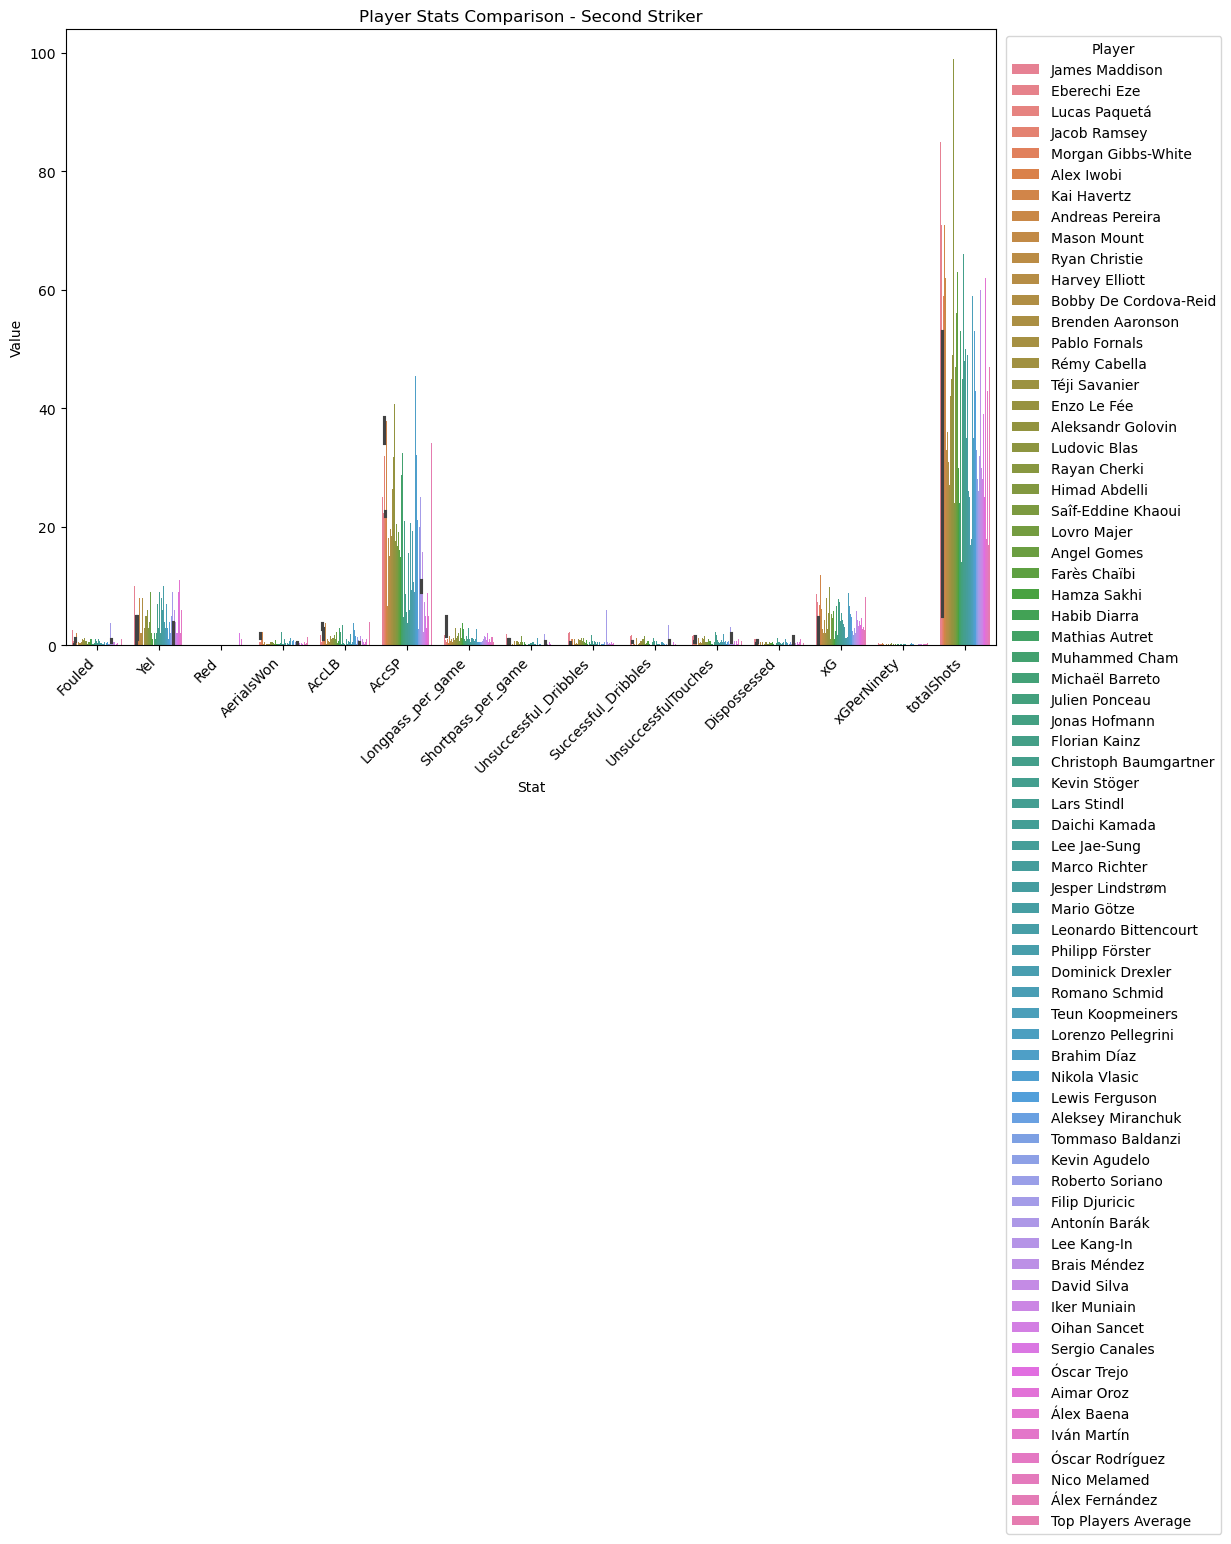

In [13]:
TARGET = 'Attacking Midfield'
most_similar_players = find_similar_players(top_players_stats, bottom_players_stats, TARGET)

top_players_stats_filtered = top_players_stats[top_players_stats['player_name'].isin(top_position_groups[position])]
similar_players_stats = bottom_players_stats[bottom_players_stats['player_name'].isin(most_similar_players)]

stat_columns = STATS_PER_POSITION[position]

top_players_avg_stats = top_players_stats_filtered[stat_columns].mean()
top_players_avg_stats = pd.DataFrame([top_players_avg_stats.values], columns=stat_columns)
top_players_avg_stats['player_name'] = 'Top Players Average'

combined_stats = pd.concat([similar_players_stats, top_players_avg_stats], ignore_index=True)
melted_stats = pd.melt(combined_stats, id_vars='player_name', value_vars=stat_columns, var_name='stat', value_name='value')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='stat', y='value', hue='player_name', data=melted_stats, palette=sns.color_palette("husl", len(combined_stats)))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Stat')
plt.ylabel('Value')
plt.title(f'Player Stats Comparison - {position}')
plt.legend(title='Player', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()